### Import the libraries

In [1]:
import pandas as pd

### Read the data

In [2]:
df = pd.read_csv('intents_classification_dataset.csv')
df

,Text,Intent
0,It'll be great if you could delete this class ...,delete_class_in_curr_file
1,please can you close this file called shells.py,close_file
2,Could you please rename method named hello tha...,rename_fun_in_curr_file
3,Would you mind copying passenger function from...,copy_fun_in_another_file
4,Would you please modify the name of routine na...,rename_fun_in_another_file
...,...,...
73338,I'm requesting you to please rename hello name...,rename_class_in_curr_file
73339,can you please duplicate this class which is c...,copy_class_in_curr_file
73340,I'd be obliged if you could save this folder n...,save_file
73341,canal is a procedure in current program I woul...,move_fun_in_curr_file


In [3]:
df['Intent'].unique()

array(['delete_class_in_curr_file', 'close_file',
       'rename_fun_in_curr_file', 'copy_fun_in_another_file',
       'rename_fun_in_another_file', 'rename_class_in_curr_file',
       'delete_fun_in_another_file', 'rename_file',
       'copy_fun_in_curr_file', 'undo', 'open_file',
       'delete_class_in_another_file', 'delete_fun_in_curr_file',
       'import_fun', 'rename_class_in_another_file',
       'move_class_in_curr_file', 'import_class',
       'move_class_in_another_file', 'move_fun_in_curr_file', 'save_file',
       'delete_file', 'move_fun_in_another_file',
       'copy_class_in_curr_file', 'create_file',
       'copy_class_in_another_file', 'redo', 'compile'], dtype=object)

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt

In [6]:
Intent_count = df['Intent'].value_counts()
Intent_count

delete_class_in_curr_file       3720
copy_class_in_curr_file         3720
copy_fun_in_curr_file           3717
delete_fun_in_curr_file         3655
import_fun                      3509
delete_class_in_another_file    3132
move_class_in_curr_file         3131
move_fun_in_curr_file           3129
delete_fun_in_another_file      3128
rename_class_in_curr_file       3060
move_class_in_another_file      3059
rename_fun_in_curr_file         3058
rename_fun_in_another_file      3056
rename_class_in_another_file    3056
move_fun_in_another_file        3027
rename_file                     3002
import_class                    2969
save_file                       2158
open_file                       2158
delete_file                     2154
close_file                      2150
copy_class_in_another_file      2040
copy_fun_in_another_file        2038
create_file                     1736
redo                            1283
undo                            1265
compile                         1233
N

<BarContainer object of 27 artists>

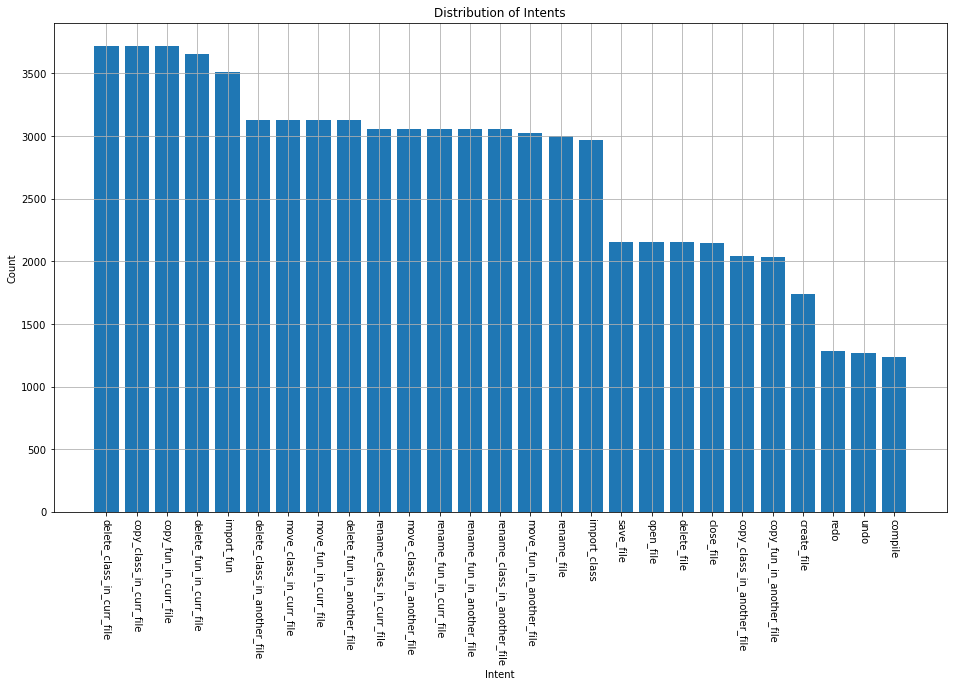

In [7]:
plt.figure(figsize=(16,9))
plt.title('Distribution of Intents')
plt.xticks(rotation=-90)
plt.xlabel('Intent')
plt.ylabel('Count')
plt.grid()
plt.bar(Intent_count.index, Intent_count.values)

### Intent Prediction Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
x = df['Text']
y = df['Intent']

In [10]:
x

0        It'll be great if you could delete this class ...
1          please can you close this file called shells.py
2        Could you please rename method named hello tha...
3        Would you mind copying passenger function from...
4        Would you please modify the name of routine na...
                               ...                        
73338    I'm requesting you to please rename hello name...
73339    can you please duplicate this class which is c...
73340    I'd be obliged if you could save this folder n...
73341    canal is a procedure in current program I woul...
73342    please could you copy arithmetical class from ...
Name: Text, Length: 73343, dtype: object

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0)

In [12]:
x_train.shape

(55007,)

#### Vectorize the data

In [13]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x)

x_train_vec = vectorizer.transform(x_train) 
x_test_vec = vectorizer.transform(x_test)

In [14]:
x_train_vec.shape

(55007, 34888)

In [15]:
x_test_vec.shape

(18336, 34888)

### Support Vector Machine (SVM)

In [16]:
from sklearn.svm import SVC

In [17]:
svc = SVC()
svc.fit(x_train_vec, y_train)

SVC()

In [18]:
y_pred_svc = svc.predict(x_test_vec)

#### Performance Analysis

In [19]:
from sklearn.metrics import classification_report, accuracy_score

In [20]:
print(classification_report(y_test, y_pred_svc))

                              precision    recall  f1-score   support

                  close_file       0.99      0.97      0.98       521
                     compile       0.99      1.00      0.99       292
  copy_class_in_another_file       1.00      1.00      1.00       512
     copy_class_in_curr_file       1.00      1.00      1.00       940
    copy_fun_in_another_file       0.99      1.00      1.00       464
       copy_fun_in_curr_file       1.00      1.00      1.00       901
                 create_file       1.00      0.97      0.99       443
delete_class_in_another_file       1.00      1.00      1.00       824
   delete_class_in_curr_file       1.00      1.00      1.00       923
                 delete_file       1.00      1.00      1.00       542
  delete_fun_in_another_file       1.00      1.00      1.00       765
     delete_fun_in_curr_file       1.00      1.00      1.00       900
                import_class       1.00      1.00      1.00       754
                  i

In [21]:
print('Accuracy score:', accuracy_score(y_test, y_pred_svc)*100)

Accuracy score: 99.67822862129145


### Multinomial Naive Bayes (MultinomialNB)

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
mnb = MultinomialNB()
mnb.fit(x_train_vec, y_train)

MultinomialNB()

In [24]:
y_pred_mnb = mnb.predict(x_test_vec)

#### Performance Analysis

In [25]:
from sklearn.metrics import classification_report, accuracy_score

In [26]:
print(classification_report(y_test, y_pred_mnb))

                              precision    recall  f1-score   support

                  close_file       0.99      0.97      0.98       521
                     compile       1.00      0.98      0.99       292
  copy_class_in_another_file       1.00      0.26      0.41       512
     copy_class_in_curr_file       0.83      1.00      0.91       940
    copy_fun_in_another_file       0.99      0.31      0.48       464
       copy_fun_in_curr_file       0.83      1.00      0.91       901
                 create_file       1.00      0.97      0.99       443
delete_class_in_another_file       0.94      0.99      0.97       824
   delete_class_in_curr_file       0.77      1.00      0.87       923
                 delete_file       1.00      0.30      0.47       542
  delete_fun_in_another_file       0.91      1.00      0.95       765
     delete_fun_in_curr_file       0.96      1.00      0.98       900
                import_class       1.00      0.97      0.98       754
                  i

In [27]:
print('Accuracy score:', accuracy_score(y_test, y_pred_mnb)*100)

Accuracy score: 88.08355148342059


### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()
lr.fit(x_train_vec, y_train)

LogisticRegression()

In [30]:
y_pred_lr = lr.predict(x_test_vec)

#### Performance Analysis

In [31]:
from sklearn.metrics import classification_report, accuracy_score

In [32]:
print(classification_report(y_test, y_pred_lr))

                              precision    recall  f1-score   support

                  close_file       0.99      0.97      0.98       521
                     compile       1.00      1.00      1.00       292
  copy_class_in_another_file       1.00      1.00      1.00       512
     copy_class_in_curr_file       1.00      1.00      1.00       940
    copy_fun_in_another_file       1.00      1.00      1.00       464
       copy_fun_in_curr_file       1.00      1.00      1.00       901
                 create_file       1.00      0.97      0.99       443
delete_class_in_another_file       1.00      1.00      1.00       824
   delete_class_in_curr_file       1.00      1.00      1.00       923
                 delete_file       1.00      1.00      1.00       542
  delete_fun_in_another_file       1.00      1.00      1.00       765
     delete_fun_in_curr_file       1.00      1.00      1.00       900
                import_class       1.00      1.00      1.00       754
                  i

In [33]:
print('Accuracy score:', accuracy_score(y_test, y_pred_lr)*100)

Accuracy score: 99.65095986038395


### Prediction on new data

In [34]:
new_text = "Can you delete the project folder?"
new_x = vectorizer.transform([new_text]) 

In [35]:
new_x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [36]:
svc_prediction = svc.predict(new_x)

nb_prediction = mnb.predict(new_x)

lr_prediction = lr.predict(new_x)

In [37]:
print("SVM Prediction:", svc_prediction)
print("Naive Bayes Prediction:", nb_prediction)
print("Logistic Regression Prediction:", lr_prediction)

SVM Prediction: ['delete_file']
Naive Bayes Prediction: ['delete_file']
Logistic Regression Prediction: ['delete_file']
